# Lending Club Loan Database Analysis

 Lending Club is a financial technology company that specializes in peer-to-peer lending; they connect investors and borrowers to create unsecured personal loans of up to $40,000. These unsecured loans are a type of alternative investment for investors, as they make interest on the loans while borrowers are supplied with their desired capital. Lending Club eventually buys the issued loans, and makes payments to the investors minus service fees, while it collects payments from the borrower.

A major problem that Lending Club faces is the risk of default, or the risk that a borrower will not pay back a portion or the entire loan amount. While Lending Club heavily screens its potential borrowers, declining approximately 90% of loan applications, the risk of default still exists. Not only does loan default cause problems for Lending Club, but other delinquencies do as well. Loans that are late or charged off are problematic, as they may default in the future and require the company to attempt to collect, which costs Lending Club time, resources, and money. 

![alt text](lendingclub.jpg "Title")

   The following database contains complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890,000 observations and 75 variables.

## Data Collection

In [319]:
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
df = pd.read_csv('loan.csv')
df.set_index('id', inplace = True)
df.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 73 columns):
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status                    887379 non-null object
pymnt_plan  

There are many columns in this dataframe that are mostly incomplete or null. I begin the data cleaning process by removing columns with mostly null values. More specifically, any column that is more than 75% null is removed.

In [322]:
total_length = 887379.0
for col in df:
    total_null = df[col].isnull().sum().sum()
    percent_null = float(total_null/total_length)*100
    if percent_null > 75:
        print("The attribute %s is %f percent null"%(col,percent_null))
        df.drop(col, axis = 1,inplace = True)

The attribute desc is 85.797726 percent null
The attribute mths_since_last_record is 84.555303 percent null
The attribute mths_since_last_major_derog is 75.015974 percent null
The attribute annual_inc_joint is 99.942415 percent null
The attribute dti_joint is 99.942640 percent null
The attribute verification_status_joint is 99.942415 percent null
The attribute open_acc_6m is 97.591559 percent null
The attribute open_il_6m is 97.591559 percent null
The attribute open_il_12m is 97.591559 percent null
The attribute open_il_24m is 97.591559 percent null
The attribute mths_since_rcnt_il is 97.654892 percent null
The attribute total_bal_il is 97.591559 percent null
The attribute il_util is 97.902024 percent null
The attribute open_rv_12m is 97.591559 percent null
The attribute open_rv_24m is 97.591559 percent null
The attribute max_bal_bc is 97.591559 percent null
The attribute all_util is 97.591559 percent null
The attribute inq_fi is 97.591559 percent null
The attribute total_cu_tl is 97.5

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Data columns (total 53 columns):
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835917 non-null object
emp_length                    842554 non-null object
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 non-null object
pymnt_plan                  

While I previously removed columns that were more than 75% null, there are still many features in the dataframe that have null values. To clean these null values, I will fill them with the median value of the respective column. 

In [324]:
df['emp_length'].fillna(value='0 years',inplace=True)
df['annual_inc'].fillna(df['annual_inc'].median(),inplace=True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(),inplace=True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(),inplace=True)
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(),inplace=True)
df['open_acc'].fillna(df['open_acc'].median(),inplace=True)
df['pub_rec'].fillna(df['pub_rec'].median(),inplace=True)
df['revol_util'].fillna(df['revol_util'].median(),inplace=True)
df['total_acc'].fillna(df['total_acc'].median(),inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(),inplace=True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].median(),inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(),inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(),inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(),inplace=True)

I will fill the null values in the emp_length column with 0, since a null value denotes 0 years of work experience. The values for emp_length are string values with the word years attached. I decided to remove the tacked on years and convert the values to integers.

In [325]:
df['emp_length'].fillna(value='0 years',inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

The following two functions return the respective month and year from the issue_d column. I will create two new rows, issue_year and issue_month to replace the issue_d.

In [326]:
def clean_year(row):
    row = str(row)
    row = row.split("-")
    return row[1]
    
def clean_month(row):
    row = str(row)
    row = row.split("-")
    return row[0]
    
df['issue_year'] = df['issue_d'].apply(lambda row: clean_year(row))
df['issue_month'] = df['issue_d'].apply(lambda row: clean_month(row))
df.drop('issue_d',axis =1, inplace = True)

In [327]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year,issue_month
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,2011,Dec
1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,2011,Dec
1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,2011,Dec
1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,2011,Dec
1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,80559.0,23700.0,2011,Dec


# Target Variable

In [328]:
df.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Feature Name | Meaning
 --- | ---
Issued |New loan that has passed review, received funding and has been issued
Current| Loan is up to date on all outstanding payments
Fully paid|A loan that  has been repaid in full including all principal and interest payments
In grace period|The loan is past due, but within the 15-day grace period
Late (16-30 days)|Loan has not been current, or up to date on outstanding payments for 16 to 30 days
Late (31-120 days) | Loan has not been current, or up to date on outstanding payments for 30 to 120 days
Default|Loan has not been current, or up to date on outstanding payments for 121 days or more
Charged off|Loan has been deemed uncollectible, no longer reasonable expectation of further payments

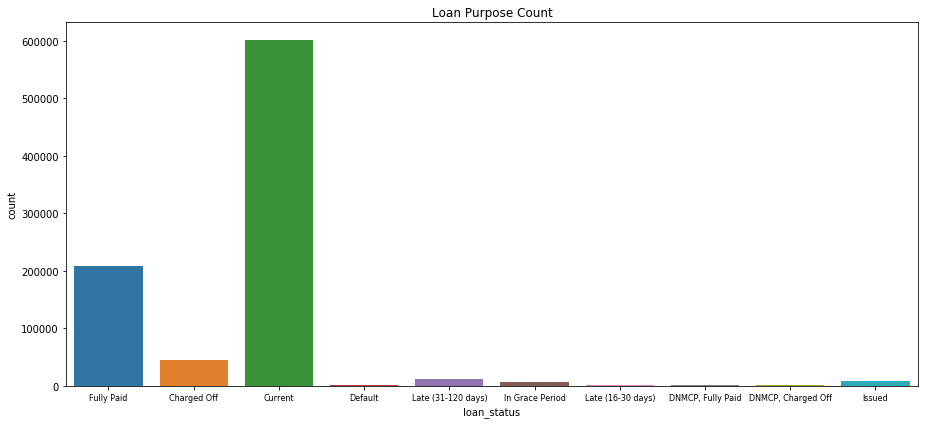

In [329]:
plt.figure(figsize = (13,6))
ax = sns.countplot(df['loan_status'])
ax.set_xticklabels(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'DNMCP, Fully Paid',
       'DNMCP, Charged Off', 'Issued'], fontsize=8)
ax.set_title('Loan Purpose Count')
plt.tight_layout()
plt.show()

In order to better understand Lending Club customers and their risk of default, I plan to perform exploratory data analysis in order to create a classifier that will predict whether a loan will be “bad”, based on the various attributes in the dataset, and ultimately test the accuracy of this model. A “bad” loan, is one in which the loan status is default, charged off, late (16-30) days, late (31-120) days or in grace period. A “good loan” is one in which the loan status is fully paid, issued, or current.

In [330]:
def target_var(row):
    if row['loan_status'] == 'Fully Paid':
        return 0
    if row['loan_status'] == 'Issued':
        return 0
    if row['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid':
        return 0
    if row['loan_status'] == 'Current':
        return 0
    if row['loan_status'] == 'Charged Off':
        return 1
    if row['loan_status'] == 'Default':
        return 1
    if row['loan_status'] == 'Late (16-30 days)':
        return 1
    if row['loan_status'] == 'Late (31-120 days)':
        return 1
    if row['loan_status'] == 'In Grace Period':
        return 1
    if row['loan_status'] == 'Does not meet the credit policy. Status:Charged Off':
        return 1
    
df['Target'] = df.apply(lambda row: target_var(row),axis=1)

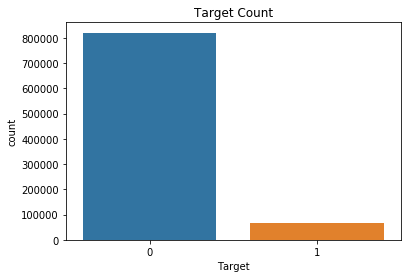

In [331]:
ax = sns.countplot(x='Target', data= df).set_title('Target Count')

In [332]:
target_count = df.groupby('Target').member_id.count()
target_total = float(df['Target'].count())
print("{} percent of loans in this dataset are good".format((float(target_count[0])/target_total)*100))
print("{} percent of loans in this dataset are bad".format((float(target_count[1])/target_total)*100))

92.4013302095 percent of loans in this dataset are good
7.59866979047 percent of loans in this dataset are bad


This is a binary classification problem as the two classes are "bad" loans and "good" loans. Upon further analysis, it seems that there is a class imbalance problem in this dataset. There is a significant imbalance between the two classes, as 93% of loans are "good" while 7% are "bad". This ratio between the two classes, approximately 13.5:1, may result in problems later on in the modelling stage.

## Exploratory Data Analysis

Although there are many attributes in this database, I will limit my exlploration to the following features: 

Feature Name | Meaning
 --- | ---
loan_amnt | The loan amount requested by the borrower
funded_amnt| The loan amount funded by the lender
funded_amnt_inv| Total amount commited by Investors
term | The length of the loan term, can be 36 months or 60 months
addr_state | The state of residence of the borrower
int_rate | Interest rate
grade | Grade assigned to loan by Lending Club (A, B, C, D, E, F, G)
purpose | The purpose of the loan provided by borrower
emp_length | Length of employment of borrower in years
home_ownership | Home ownership status. (Rent, own, mortgage, other)
annual_inc | Annual income of borrower
dti | Debt to Income ratio
installment | Monthly payment of the borrower




## Loan Characteristics

I begin my analysis by exploring the various features directly associated with the loans created by Lending Club. These variables provide us information about the loan amount, installment, length, etc. 

### Loan Amount

loan_amnt: The loan amount requested by the borrower

funded_amnt: The loan amount funded by the lender

funded_amnt_inv: Total loan amount commited by investors

These three features are tied closely together and give relevant information about how large the desired loan is and how much was actually matched by investors.

In [254]:
df['loan_amnt'].describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

Text(0.5,1,u'Total Amount Commited by Investors')

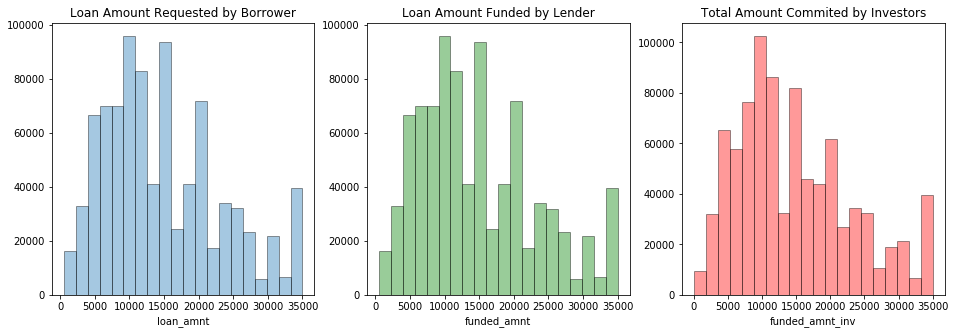

In [255]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(df['loan_amnt'], ax=ax[0], bins = 20, hist = True, kde = False,
                  hist_kws={'edgecolor':'black'}).set_title('Loan Amount Requested by Borrower')

sns.distplot(df['funded_amnt'],ax=ax[1], color = 'green', bins = 20, hist = True, kde = False,
                  hist_kws={'edgecolor':'black'}).set_title('Loan Amount Funded by Lender')

sns.distplot(df['funded_amnt_inv'],ax=ax[2],color = 'red', bins = 20, hist = True, kde = False,
                  hist_kws={'edgecolor':'black'}).set_title('Total Amount Commited by Investors')

The distribution of loan_amnt, funded_amnt, funded_amnt_inv all appear to be slightly skewed righward. The three distributions share a very similar shape and none contain any clear outliers. This makes sense because Lending Club caps loans to $40,0000.

In [256]:
print('Loan Amount Skew: {}'.format(stats.skew(df['loan_amnt'])))
print('Funded Amount Skew: {}'.format(stats.skew(df['funded_amnt'])))
print('Funded Amount by Investors Skew: {}'.format(stats.skew(df['funded_amnt_inv'])))

Loan Amount Skew: 0.68168199261
Funded Amount Skew: 0.683743434566
Funded Amount by Investors Skew: 0.680981488901


While the three distributions are clearly not normal, they are not skewed too significantly and will not need to be normalized.

In [257]:
def loan_amnt_tier(row, col):
    if row[col] < 10000:
        return 'Low'
    if row[col] < 20000:
        return 'Med'
    else:
        return 'High'
    
    
df['loan_amnt_level'] = df.apply(lambda row: loan_amnt_tier(row, 'loan_amnt'), axis =1)
df['funded_amnt_level'] = df.apply(lambda row: loan_amnt_tier(row, 'funded_amnt'), axis =1)
df['funded_amnt_inv_level'] = df.apply(lambda row: loan_amnt_tier(row, 'funded_amnt_inv'), axis =1)

To gain a better understanding between loan amounts and the target variable, I grouped the loan amounts into three categories; low, med, and high. Low loans are between 0 and 10,000, med loans are between 10,000 and 20,000, while high loans are greater than 20,000. This grouping allows for an effective visualization of the relationship between loan amounts and the target variable.

Text(0.5,1,u'Total Amount Commited by Investors')

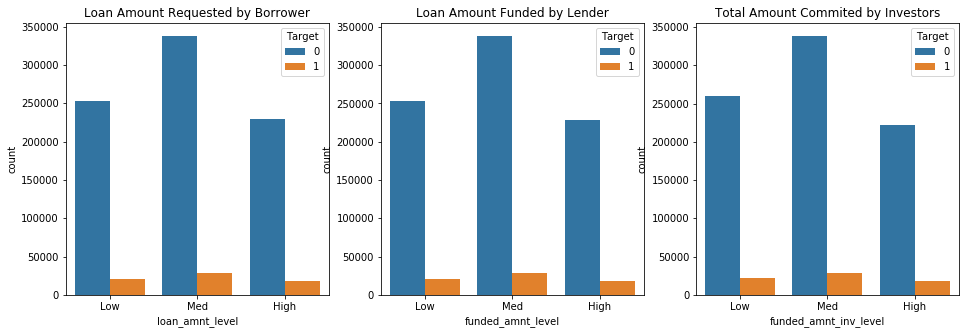

In [258]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.countplot(x = 'loan_amnt_level', ax=ax[0], hue = 'Target',data = df).set_title('Loan Amount Requested by Borrower')
sns.countplot(x = 'funded_amnt_level', ax=ax[1], hue = 'Target',data = df).set_title('Loan Amount Funded by Lender')
sns.countplot(x = 'funded_amnt_inv_level', ax=ax[2], hue = 'Target',data = df).set_title('Total Amount Commited by Investors')

It is clear that there is little to no correlation between our target variable and loan amounts.

In [259]:
df['Target'].corr(df['loan_amnt'])

print('Loan Amount Correlation with Target: {}'.format(df['Target'].corr(df['loan_amnt'])))
print('Funded Amount Correlation with Target: {}'.format(df['Target'].corr(df['funded_amnt'])))
print('Funded Amount by Investors Correlation with Target: {}'.format(df['Target'].corr(df['funded_amnt_inv'])))

Loan Amount Correlation with Target: 0.00351174589599
Funded Amount Correlation with Target: 0.00280827661318
Funded Amount by Investors Correlation with Target: 6.890109201e-06


Although there is a lack of correlation between our target variable and loan amounts, there is strong correlation between the loan amount variables. This high correlation between multiple variables, also called multicolinearity, can cause problems in the modelling stage and represents redundancy. Therefore, we will remove the two least correlated features prior to building our model.

Text(0.5,1,u'Loan Amount Correlation HeatMap')

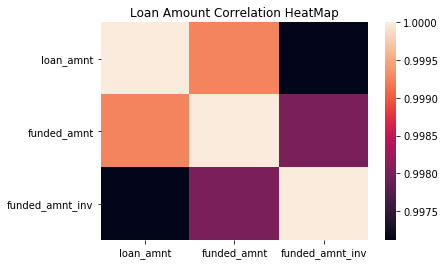

In [260]:
amnt_df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].copy()
sns.heatmap(amnt_df.corr()).set_title('Loan Amount Correlation HeatMap')

### Installment

Installment is the monthly payment of the borrower.

In [261]:
df['installment'].describe()

count    887379.000000
mean        436.717127
std         244.186593
min          15.670000
25%         260.705000
50%         382.550000
75%         572.600000
max        1445.460000
Name: installment, dtype: float64

Text(0.5,1,u'Distribution of Loan Installment')

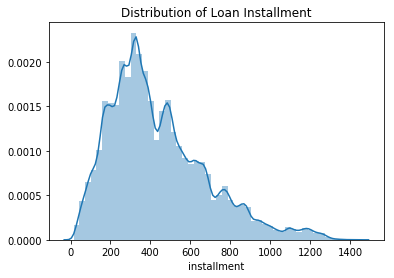

In [262]:
sns.distplot(df['installment']).set_title('Distribution of Loan Installment')

Based on the distribution plot above, it is apparent that installment is skewed rightward significantly. I may normalize this feature prior to modeling. 

In [263]:
print('Installment Skew: {}'.format(stats.skew(df['installment'])))

Installment Skew: 0.936950762322


In [264]:
print('Correlation between Installment and Target: {}'.format(df['installment'].corr(df['Target'])))

Correlation between Installment and Target: 0.0141244069123


In [265]:
print('Correlation between Installment and Loan Amount: {}'.format(df['loan_amnt'].corr(df['installment'])))

Correlation between Installment and Loan Amount: 0.944977240836


While the installment is not highly correlated with the target variable, it is strongly correlated with loan amount and adds to the high multicolinearity in this dataset. 

### Loan Grade

Loan grades are given on a risk basis. The most secure loans are deemed grade A, while the riskiest loans are deemed grade G. Higher grade loans are less risky, meaning they have lower expected volatility and loan loss, but produce lower expected returns since they bear lower interest payments. Contrastingly, lower grade loans carry more risk, as they have higher than expected volatility and loan loss, however they generate higher than expected returns due to higher interest payments. Therefore, Lending Club attempts to optimize a specific grade distribution of loans to retain an ideal risk/return ratio. 

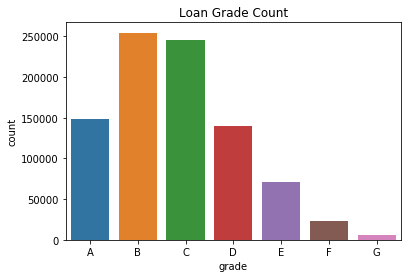

In [266]:
ax = sns.countplot(x='grade', order = ['A','B','C','D','E','F','G'], data= df).set_title('Loan Grade Count')

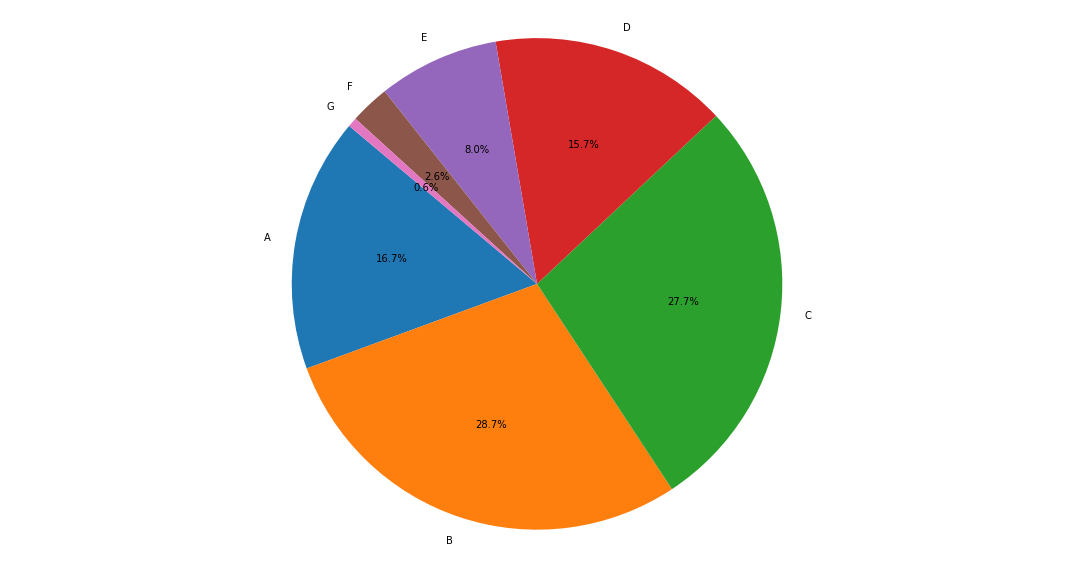

In [267]:
labels = list(df['grade'].value_counts().sort_index().index)
sizes = list(df['grade'].value_counts().sort_index().values)
explode = (0.05, 0, 0, 0, 0, 0, 0)
plt.figure(figsize = (15,8))
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', startangle=140)

#patches, texts = plt.pie(sizes,shadow=True, startangle=90,)
#plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


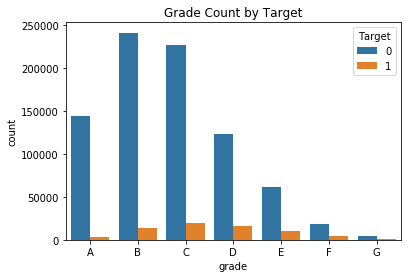

In [268]:
ax = sns.countplot(x='grade', order = ['A','B','C','D','E','F','G'],data= df, hue = 'Target').set_title('Grade Count by Target')

In [269]:
grade_df = pd.DataFrame()
grade_df['Number of Bad Loans'] = df.groupby('grade').Target.sum()
grade_df['Total Number of Loans'] = df.groupby('grade').Target.count()
grade_df['Bad Loan Percentage'] = grade_df['Number of Bad Loans']/grade_df['Total Number of Loans']*100
print(grade_df)

       Number of Bad Loans  Total Number of Loans  Bad Loan Percentage
grade                                                                 
A                     3663                 148202             2.471627
B                    13456                 254535             5.286503
C                    19054                 245860             7.749939
D                    15859                 139542            11.365037
E                     9745                  70705            13.782618
F                     4383                  23046            19.018485
G                     1269                   5489            23.118965


It is apparent that there is a clear relationship between loan grade and the target variable. Bad loan percentage increases as the loans get worse in quality. In fact, almost 1/4th of all G grade loans are bad. While this is not necissarily suprising since these low grade loans are riskier by nature, there is a significant relationship

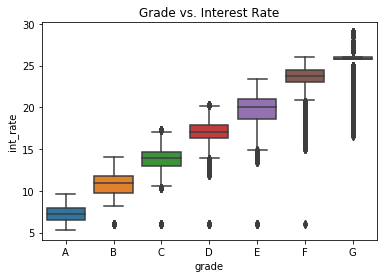

In [270]:
ax =sns.boxplot(x = 'grade', y = 'int_rate',order = ['A','B','C','D','E','F','G'], data = df).set_title('Grade vs. Interest Rate')

### Term

Lending Club loans can have a term of either 36 or 60 months, with a majority being 36 months

Text(0.5,1,u'Term Count')

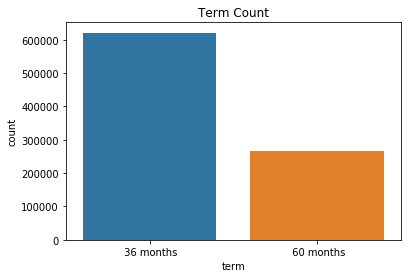

In [271]:
sns.countplot(df['term']).set_title('Term Count')

In [272]:
term_count = df.groupby('term').Target.count()
term_total = float(df['Target'].count())
print("{} percent of loans have 36 month terms".format((float(term_count[0])/term_total)*100))
print("{} percent of loans have 60 month terms".format((float(term_count[1])/term_total)*100))

69.9954585358 percent of loans have 36 month terms
30.0045414642 percent of loans have 60 month terms


I now explore terms relationship with a few other variables.


It seems that there is a difference between the grade distributions for the two terms. While the 36 month distribution is clearly skewed rightward, indicating a higher rate of better grade loans, 60 months has a roughly normal distribution. This near normal distribution indicates that 60 month loans have a tendency towards and thus a higher rate of low grade loans.

Text(0.5,1,u'Term Count per Grade')

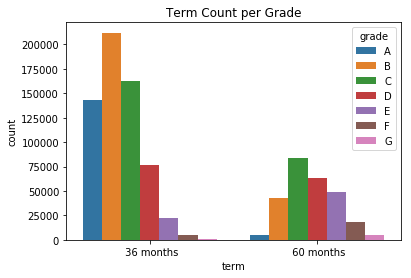

In [273]:
sns.countplot(df['term'], hue = df['grade'], hue_order = ['A','B','C','D','E','F','G']).set_title('Term Count per Grade')

Term is clearly positively correlated with interest rate and loan amount. This makes intuitive sense since higher interest rates are charged for longer term loans. Also, if your loan amount is high you are more likely to have a longer term than if your loan amount was very small.

Text(0.5,1,u'Term Count vs. Loan Amount')

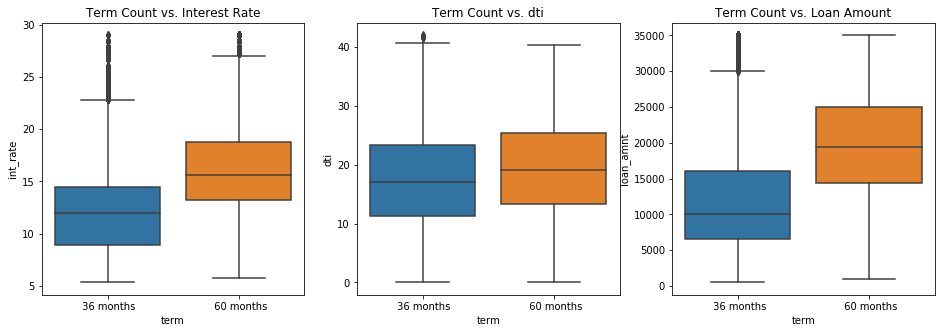

In [274]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.boxplot(x = df['term'], y= df['int_rate'], ax=ax[0]).set_title('Term Count vs. Interest Rate')
sns.boxplot(x = df['term'], y= df_out['dti'], ax=ax[1]).set_title('Term Count vs. dti')
sns.boxplot(x = df['term'], y= df['loan_amnt'],ax=ax[2]).set_title('Term Count vs. Loan Amount')

I now analyze terms relationship with the target variable

Text(0.5,1,u'Term Count per Target')

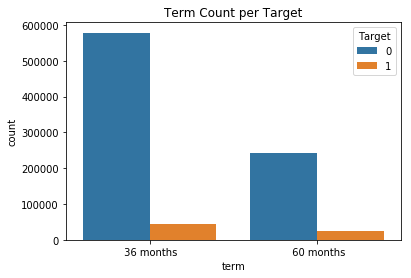

In [275]:
sns.countplot(df['term'], hue = df['Target']).set_title('Term Count per Target')

In [276]:
term_df = pd.DataFrame()
term_df['Number of Bad Loans'] = df.groupby('term').Target.sum()
term_df['Total Number of Loans'] = df.groupby('term').Target.count()
term_df['Bad Loan Percentage'] = term_df['Number of Bad Loans']/term_df['Total Number of Loans']*100
print(term_df)

            Number of Bad Loans  Total Number of Loans  Bad Loan Percentage
term                                                                       
 36 months                42931                 621125             6.911813
 60 months                24498                 266254             9.200989


There seems to be a sigificant relationship between a longer term and the percentage of bad loans. While it is not huge, there is clearly a higher rate of bad loans for 60 month terms than 36 month terms.

### Loan Purpose

It appears that most loans generated by Lending Club are used for the purpose of paying back debts, either debt consolidation or credit cards. One would expect that loans used for this purpose would have a proportionately higher bad loan rate than other purposes such as home improvement or paying for a car. I will further explore their relationship with the target variable.

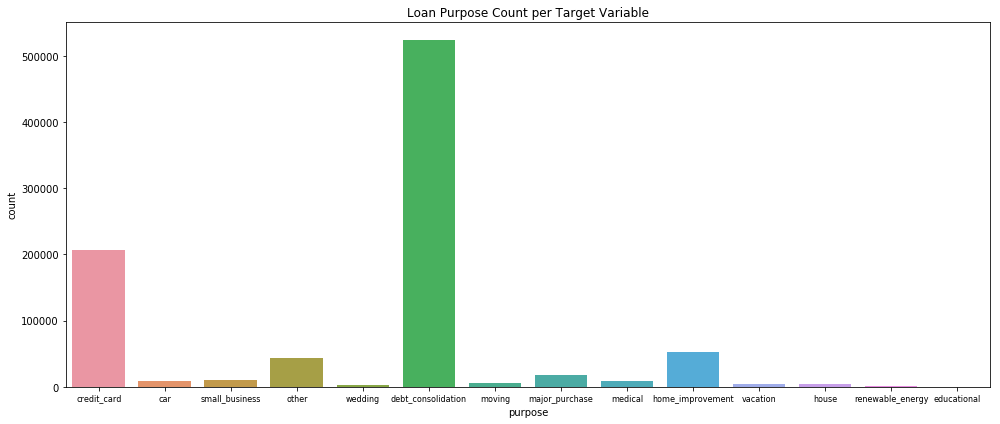

In [277]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x='purpose', order = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'moving', 'major_purchase',
       'medical', 'home_improvement', 'vacation', 'house', 'renewable_energy',
       'educational'], data= df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_title('Loan Purpose Count per Target Variable')
plt.tight_layout()
plt.show()

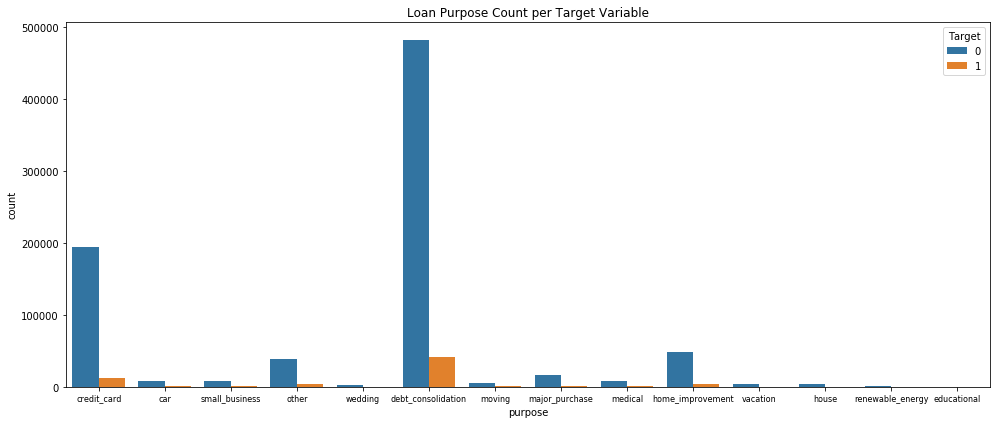

In [278]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x='purpose', order = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'moving', 'major_purchase',
       'medical', 'home_improvement', 'vacation', 'house', 'renewable_energy',
       'educational'], hue = 'Target', data= df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_title('Loan Purpose Count per Target Variable')
plt.tight_layout()
plt.show()

Suprisingly, loans that were used for the purposes of education and small businesses have the highest bad loan rate. Loans used for the purposes of paying off debts, debt consolidation and credit cards, had lower than average bad loan rates. 

In [279]:
purpose_df = pd.DataFrame()
purpose_df['total_bad'] = df.groupby('purpose').Target.sum()
purpose_df['total_loan']= df.groupby('purpose').Target.count()
purpose_df['bad_pct'] = purpose_df['total_bad']/purpose_df['total_loan'] * 100
purpose_df.reset_index(inplace=True)
print('Average Bad Loan Percentage: {}% \n'.format(purpose_df['bad_pct'].mean()))
print(purpose_df)


Average Bad Loan Percentage: 10.5413406818% 

               purpose  total_bad  total_loan    bad_pct
0                  car        596        8863   6.724585
1          credit_card      11755      206182   5.701274
2   debt_consolidation      41608      524215   7.937201
3          educational         88         423  20.803783
4     home_improvement       3553       51829   6.855235
5                house        417        3707  11.248988
6       major_purchase       1294       17277   7.489726
7              medical        804        8540   9.414520
8               moving        607        5414  11.211673
9                other       4163       42894   9.705320
10    renewable_energy         72         575  12.521739
11      small_business       1781       10377  17.162957
12            vacation        402        4736   8.488176
13             wedding        289        2347  12.313592


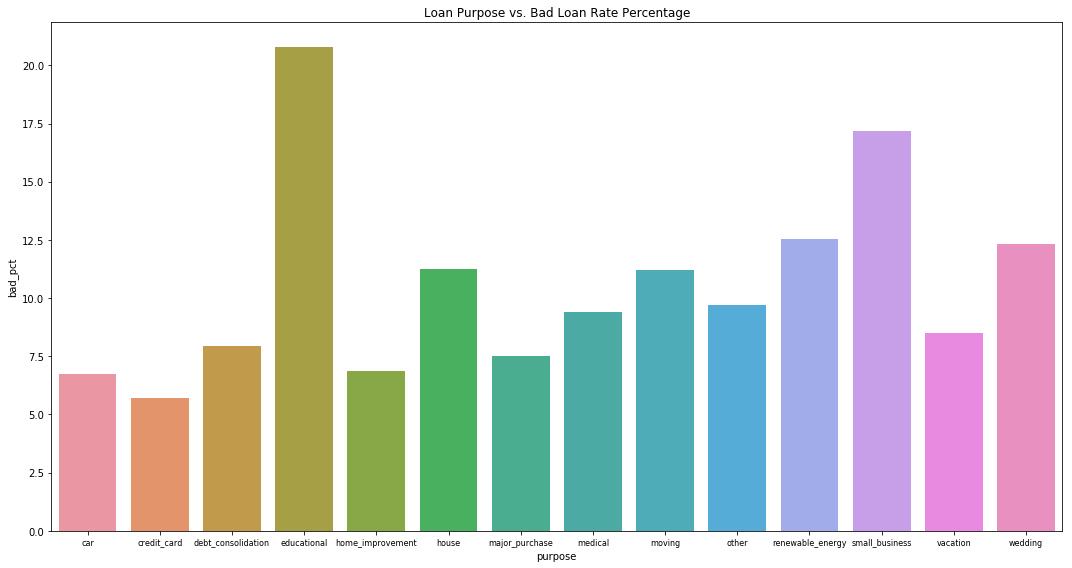

In [280]:
purpose_df['bad_pct'].apply(lambda x: float(x))
plt.figure(figsize=(15,8))
ax = sns.barplot(y =purpose_df['bad_pct'], x = purpose_df['purpose'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_title('Loan Purpose vs. Bad Loan Rate Percentage')
plt.tight_layout()
plt.show()

Although the bad loan rate was highest among the educational and small business purposes, this may be conflated due to the relative number of loans. The amount of loans used for these purposes is minimal compared to debt consolidation and credit cards. This small sample size may account for the disparity and higher bad loan rate. While Lending Club should take this information into account, I would not recommend any action against loans created for educational or small business purposes.

### Interest Rate 

An interest rate is the amount of interest due per period, as a proportion of the amount lent, deposited or borrowed.
Lending Loan calculates interest rates based on two factors: the term to maturity of the investment (term) and the perceived default probability of the borrower (grade)

In [281]:
df['int_rate'].describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

Like most of the distributions in this dataset, interest rates distribution is skewed rightward. Although there is no significant outliers causing this skew, it is not normally distributed.

Text(0.5,1,u'Distribution of Interest Rates')

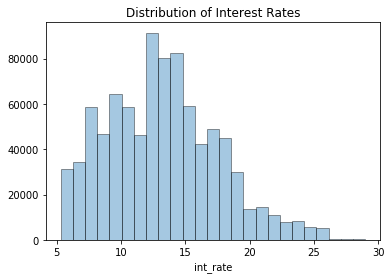

In [282]:
sns.distplot(df['int_rate'], hist=True, kde=False, 
             bins=25, hist_kws={'edgecolor':'black'}).set_title("Distribution of Interest Rates")

In [283]:
print('Interest Rate Skew: {}'.format(stats.skew(df['int_rate'])))

Interest Rate Skew: 0.429479901914


Text(0.5,1,u'Interest Rate vs. Grade')

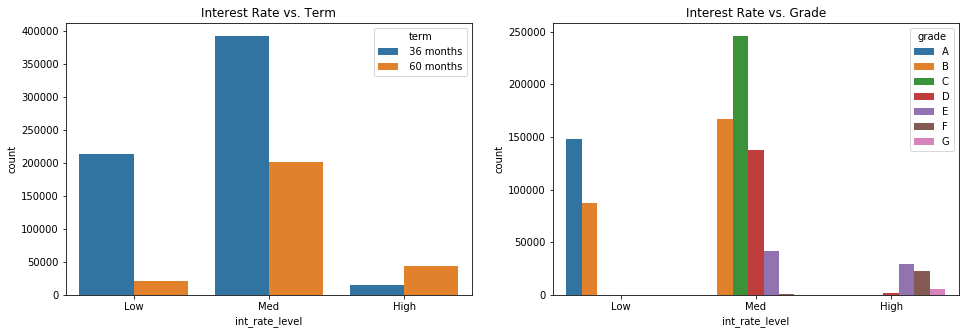

In [284]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(x = 'int_rate_level', order = ['Low','Med','High'], hue = 'term',
              ax=ax[0], data = df).set_title('Interest Rate vs. Term')
sns.countplot(x = 'int_rate_level', order = ['Low','Med','High'], hue = 'grade',
              ax=ax[1],hue_order =  ['A','B','C','D','E','F','G'], data = df).set_title('Interest Rate vs. Grade')


To make an effective visualization of Interest Rates relationship with the target variable, I group the values into three different categories: low, med, and high. Low interest rates are below 10%, med are between 10 and 20%, and high are greater than 20%

In [285]:
def int_rate_tier(row):
    if row['int_rate'] < 10:
        return 'Low'
    if row['int_rate'] < 20:
        return 'Med'
    else:
        return 'High'
df['int_rate_level'] = df.apply(lambda row: int_rate_tier(row), axis =1)

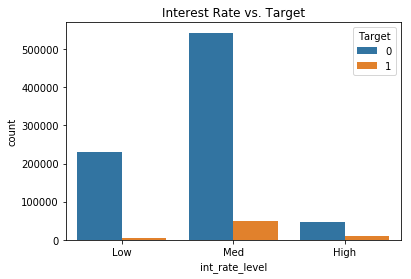

In [286]:
ax = sns.countplot(x = 'int_rate_level', order = ['Low','Med', 'High'], hue = 'Target',data = df).set_title('Interest Rate vs. Target')

In [287]:
num_bad = df.groupby('int_rate_level').sum()['Target'].values
total = df['int_rate_level'].value_counts().values
low_rate = (num_bad[1]/float(total[1]))*100
med_rate = (num_bad[2]/float(total[0]))*100
high_rate = (num_bad[0]/float(total[2]))*100
print('{} % of Low interest rate loans are bad'.format(low_rate))
print('{} % of Med interest rate loans are bad'.format(med_rate))
print('{} % of High interest rate loans are bad'.format(high_rate))

2.39750180567 % of Low interest rate loans are bad
8.50855861094 % of Med interest rate loans are bad
19.2699982944 % of High interest rate loans are bad


In [288]:
df['Target'].corr(df['int_rate'])

0.17545032207541023

Out of all the features we have explored, interest rate is the most strongly correlated with target. 

### Issue date

Since 2007, the number of loans issued per year has substantitally increased. In 2007, only about 700 loans were issued. By 2015, 430,000 loans were issued per year. 

In [289]:
year_df = pd.DataFrame()
year_df['issue_count'] = df.groupby(['issue_year']).Target.count()
year_df['issue_target'] = df.groupby(['issue_year']).Target.sum()
year_df['bad_pct'] = (df.groupby(['issue_year']).Target.sum()/df.groupby(['issue_year']).Target.count())*100

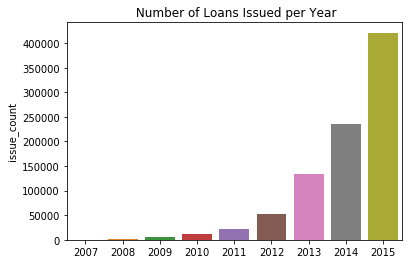

In [290]:
ax = sns.barplot(x = year_df.index.values, y = year_df['issue_count'] ).set_title(' Number of Loans Issued per Year')

Not only is the number of loans issued per year increasing, but the average loan amount is increasing each year.

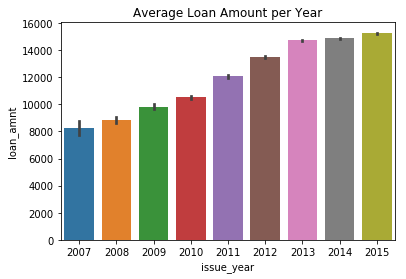

In [291]:
ax = sns.barplot(x = 'issue_year', y = 'loan_amnt', data = df).set_title('Average Loan Amount per Year')

Although the number of loans issue per year are increasing, the bad loan percentage has been decreasing throughout the years. In their first year, the bad loan percentage was around 25%. In 2015 it dropped to a little under 5%. 

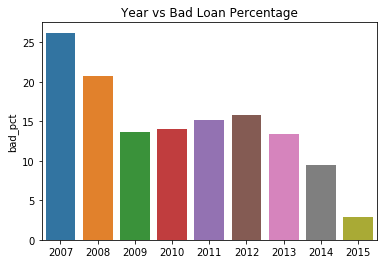

In [292]:
ax = sns.barplot(x=year_df.index.values, y = year_df['bad_pct'] ).set_title('Year vs Bad Loan Percentage')

In [293]:
month_df = pd.DataFrame()
month_df['issue_count'] = df.groupby(['issue_month']).Target.count()
month_df['issue_target'] = df.groupby(['issue_month']).Target.sum()
month_df['bad_pct'] = (df.groupby(['issue_month']).Target.sum()/df.groupby(['issue_month']).Target.count())*100

It appears that the months with the most loans issued are October, November and December. These months coincide with the holiday season in the U.S, a period of increased spending and thus consumer debt.

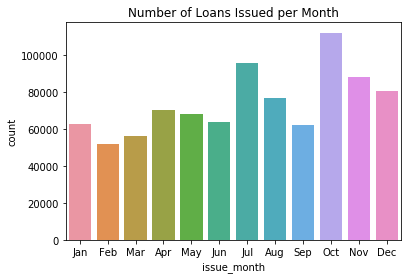

In [294]:
ax = sns.countplot(df['issue_month'], order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] ).set_title('Number of Loans Issued per Month')

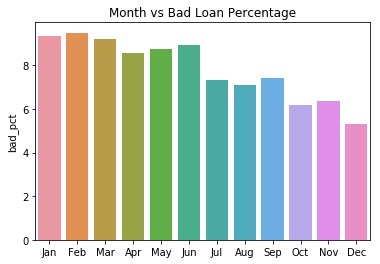

In [295]:
ax = sns.barplot(x=month_df.index.values, y = month_df['bad_pct'],
                 order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set_title('Month vs Bad Loan Percentage')

It is interesting to note how the bad loan percentage decreases gradually throughout the year.

## Member Financial and Demographic Characterstics

### Debt to Income Ratio

Debt to income ratio is a measure of financial health. It is one way lenders, including mortgage lenders, measure an individual's ability to manage monthly payment and repay debts. Dti is calculated by dividing total debt by total income. A high dti indicates a large amount of debt relative to income. 

The median dti in our dataset is 17.65, but there appears to be many outliers in this feature. The max dti is 9999 which is unusually high and worth a deeper investigation. 

In [296]:
df['dti'].describe()

count    887379.000000
mean         18.157039
std          17.190626
min           0.000000
25%          11.910000
50%          17.650000
75%          23.950000
max        9999.000000
Name: dti, dtype: float64

In [297]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df_out = remove_outlier(df, 'dti')

The extremely large dti outliers that are skewing our distribution are the result of an extremely small or nonexistant income. It is not known whether or not these values are errors, but they are affecting our ability to visualize our dti data and will be removed for these purposes. 

In [298]:
print('Skew with outliers: {}'.format(stats.skew(df['dti'])))
print('Skew with outliers removed: {}'.format(stats.skew(df_out['dti'])))

Skew with outliers: 441.486028815
Skew with outliers removed: 0.226791073035


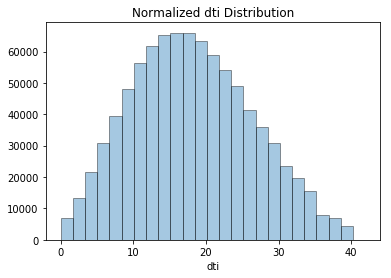

In [299]:
ax = sns.distplot(df_out['dti'], hist=True, kde=False, 
             bins=25, hist_kws={'edgecolor':'black'}).set_title('Normalized dti Distribution')

In [300]:
print('Correlation with Target with Outliers: {}'.format(df['Target'].corr(df['dti'])))
print('Correlation with Target without Outliers: {}'.format(df['Target'].corr(df_out['dti'])))

Correlation with Target with Outliers: 0.0099613152071
Correlation with Target without Outliers: 0.021573134933


### Annual Income

Total amount of income earned annually by the borrower

In [301]:
df['annual_inc'].describe()

count    8.873790e+05
mean     7.502754e+04
std      6.469816e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [302]:
df_out_inc = remove_outlier(df, 'annual_inc')

The Annual Income distribution is skewed heavily rightward due to some extremely high income outliers. For visualization purposes, I have removed outliers. Even after removing outliers, it appears that the ditribution is still skewed rightward. I will normalize this feature prior to modeling.

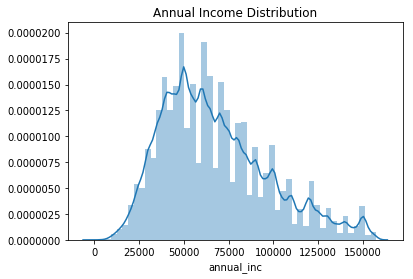

In [303]:
ax =sns.distplot(df_out_inc['annual_inc']).set_title('Annual Income Distribution')

In [304]:
print('Skew with outliers: {}'.format(stats.skew(df['annual_inc'])))
print('Skew with outliers removed: {}'.format(stats.skew(df_out_inc['annual_inc'])))

Skew with outliers: 44.4785067863
Skew with outliers removed: 0.730023749922


In [305]:
print('Annual Inc Correlation with Target: {}'.format(df['Target'].corr(df_out_inc['annual_inc'])))

Annual Inc Correlation with Target: -0.0521681614855


### Home Ownership

Home ownership status. (Rent, own, mortgage, other)

In [306]:
df['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

A large majority of borrowers either have a mortgage or rent their home. A smaller portion owns their home while very few fall under other, none or any.

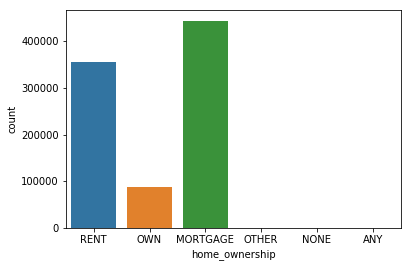

In [307]:
sns.countplot(df['home_ownership'])

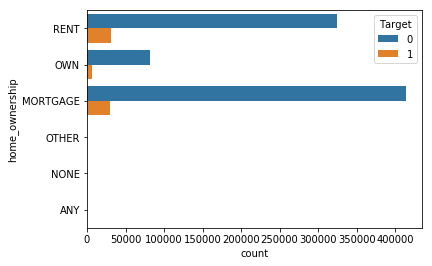

In [308]:
ax = sns.countplot(y='home_ownership',  hue = 'Target', data= df)

The three largest home ownership categories, mortgage, own, and rent all have similar bad loan percentages at around 6-8%. On the other hand, none and other had much larger bad loan percentages at around 16% to 20%. This larger proportion of bad loans may be due to their small size.

In [309]:
home_df = pd.DataFrame()
home_df['Number of Bad Loans'] = df.groupby('home_ownership').Target.sum()
home_df['Total Number of Loans'] = df.groupby('home_ownership').Target.count()
home_df['Bad Loan Percentage'] = home_df['Number of Bad Loans']/home_df['Total Number of Loans']*100
print(home_df)

                Number of Bad Loans  Total Number of Loans  \
home_ownership                                               
ANY                               0                      3   
MORTGAGE                      29699                 443557   
NONE                              8                     50   
OTHER                            38                    182   
OWN                            6293                  87470   
RENT                          31391                 356117   

                Bad Loan Percentage  
home_ownership                       
ANY                        0.000000  
MORTGAGE                   6.695645  
NONE                      16.000000  
OTHER                     20.879121  
OWN                        7.194467  
RENT                       8.814800  


### Geographical Location

In [310]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

States with larger populations such as California, New York, and Texas seem to have the most loans issued per state. 

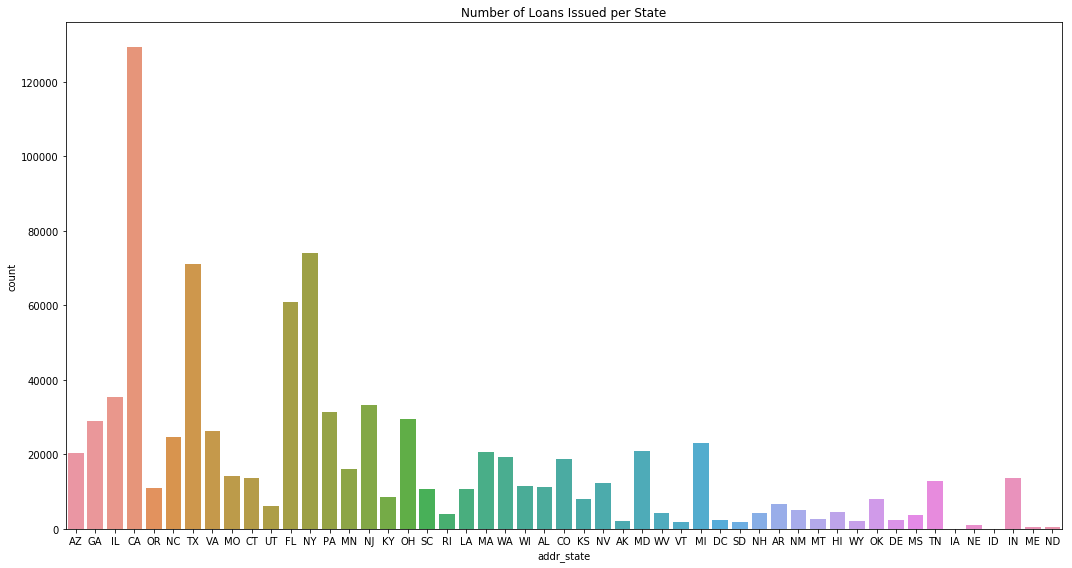

In [311]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df['addr_state'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_title('Number of Loans Issued per State')
plt.tight_layout()
plt.show()

In [312]:
state_loan_amnt = df.groupby(['addr_state'], as_index=False).loan_amnt.sum()
states = state_loan_amnt['addr_state'].values.tolist()

for col in state_loan_amnt.columns:
    state_loan_amnt[col] = state_loan_amnt[col].astype(str)
    
state_loan_amnt['text'] = state_loan_amnt['addr_state'] 

In [313]:
data = dict(type = 'choropleth',
            locations = states,
            z = state_loan_amnt['loan_amnt'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= state_loan_amnt['text'],
            colorbar = {'title':'US$'})

layout = dict(title = 'Loan Amount by State',
                geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

This interactive visualization shows the total dollar amount of loans per state. The states with the largest loans issued seem to have the largest total dollar amount. These amounts range widly, with California generating 1.9 Billion in loans while Idaho generates only 88k. 

In [314]:
state_num_target = df.groupby(['addr_state'], as_index = False).Target.sum()
state_num_loan = df.groupby(['addr_state'], as_index = False).Target.count()
state_pct_target = state_num_target['Target']/state_num_loan['Target']*100
state_avg_int_rate = df.groupby(['addr_state'], as_index = False).int_rate.mean()

for col in state_num_target.columns:
    state_num_target[col] = state_num_target[col].astype(str)
    
for col in state_num_loan.columns:
    state_num_loan[col] = state_num_loan[col].astype(str)    

for col in state_avg_int_rate.columns:
    state_avg_int_rate[col] = state_avg_int_rate[col].astype(str) 

for col in state_pct_target.values:
    state_pct_target.values.astype(str) 
    
state_num_target['text'] = state_num_target['addr_state'] + '<br>' +\
'Number of Bad Loans: ' + state_num_target['Target'] + '<br>' + \
'Number of Total Loans: ' + state_num_loan['Target'] + '<br>' + \
'Average Interest Rate: ' + state_avg_int_rate['int_rate'] 

In [315]:
data = dict(type = 'choropleth',
            locations = states,
            z = state_pct_target.values,
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= state_num_target['text'],
            colorbar = {'title':'%'})

layout = dict(title = 'Bad Loan % by State',
                geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

This interactive visualization shows the various bad loan percentage for each respective state. States like Iowa, Nevada and Hawaii had the highest bad loan percentages while Maine, North Dakota and Nebraska had the lowest. Lending Club could use this information to target their marketing to regions with lower bad loan percentages.

### Employment Length

Employment Length is a measure of how long the borrower has been employed. Values range from 0-10+, with most borrowers having 10 or more years employed.

Text(0.5,1,u'Employment Length Count')

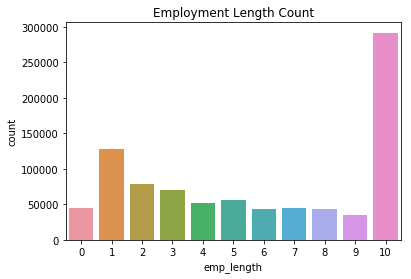

In [316]:
sns.countplot(df['emp_length'], order = ['0','1','2','3','4','5','6','7','8','9','10']).set_title('Employment Length Count')

Text(0.5,1,u'Employment Length Count')

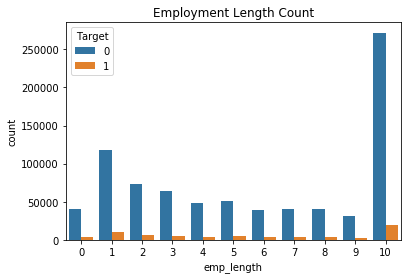

In [317]:
sns.countplot(df['emp_length'], hue = df['Target'],
              order = ['0','1','2','3','4','5','6','7','8','9','10']).set_title('Employment Length Count')

In [318]:
length_df = pd.DataFrame()
length_df['total_bad'] = df.groupby('emp_length').Target.sum()
length_df['total_loan']= df.groupby('emp_length').Target.count()
length_df['bad_pct'] = (length_df['total_bad']/length_df['total_loan']) * 100
print(length_df)

            total_bad  total_loan   bad_pct
emp_length                                 
0                3710       44825  8.276631
1               10309      127700  8.072827
10              19856      291569  6.810052
2                6034       78870  7.650564
3                5396       70026  7.705709
4                4089       52529  7.784272
5                4540       55704  8.150223
6                3840       42950  8.940629
7                3730       44594  8.364354
8                3258       43955  7.412126
9                2667       34657  7.695415


It is clear that the target variable is not correlated with employment length at all. Most employment length categories have a bad loan percentage of 6-8%.

## Preparation for Modelling

Next, we want to see how many unique values each column has. If a column is non-continuous and has a large amount of unique values, we will get rid of it. 

In [333]:
for col in df:
        print("%s %d " % (col,df[col].nunique()))

member_id 887379 
loan_amnt 1372 
funded_amnt 1372 
funded_amnt_inv 9856 
term 2 
int_rate 542 
installment 68711 
grade 7 
sub_grade 35 
emp_title 299271 
emp_length 11 
home_ownership 6 
annual_inc 49384 
verification_status 3 
loan_status 10 
pymnt_plan 2 
url 887379 
purpose 14 
title 63144 
zip_code 935 
addr_state 51 
dti 4086 
delinq_2yrs 29 
earliest_cr_line 697 
inq_last_6mths 28 
mths_since_last_delinq 155 
open_acc 77 
pub_rec 32 
revol_bal 73740 
revol_util 1356 
total_acc 135 
initial_list_status 2 
out_prncp 248332 
out_prncp_inv 266244 
total_pymnt 506726 
total_pymnt_inv 506616 
total_rec_prncp 260227 
total_rec_int 324635 
total_rec_late_fee 6181 
recoveries 23055 
collection_recovery_fee 20708 
last_pymnt_d 98 
last_pymnt_amnt 232451 
next_pymnt_d 100 
last_credit_pull_d 103 
collections_12_mths_ex_med 12 
policy_code 1 
application_type 2 
acc_now_delinq 8 
tot_coll_amt 10325 
tot_cur_bal 327342 
total_rev_hi_lim 21251 
issue_year 9 
issue_month 12 
Target 2 


In [334]:
df.drop(columns = ['emp_title','url', 'member_id' ,'title','zip_code','policy_code',
                  'verification_status','earliest_cr_line','last_pymnt_d',
                'next_pymnt_d', 'last_credit_pull_d', 'emp_length', 'sub_grade'],  inplace = True)

In [335]:
train_df = df.copy()
train_df.drop(columns = ['loan_status'], inplace = True)

In [336]:
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
grade                   7
home_ownership          6
pymnt_plan              2
purpose                14
addr_state             51
initial_list_status     2
application_type        2
issue_year              9
issue_month            12
dtype: int64

In order to build our model, we must label encode our categorical features with <=2 possible values and hot encode features with >2 possible values

In [337]:
from sklearn import preprocessing

count = 0

for col in train_df:
    if train_df[col].dtype == 'object':
        if len(list(train_df[col].unique())) <= 2:     
            label_encode = preprocessing.LabelEncoder()
            train_df[col] = label_encode.fit_transform(train_df[col])
            count += 1

In [338]:
train_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,pymnt_plan,...,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,issue_year,issue_month,Target
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,0,10.65,162.87,B,RENT,24000.0,0,...,171.62,0.0,0,0.0,0.0,80559.0,23700.0,2011,Dec,0
1077430,2500.0,2500.0,2500.0,1,15.27,59.83,C,RENT,30000.0,0,...,119.66,0.0,0,0.0,0.0,80559.0,23700.0,2011,Dec,1
1077175,2400.0,2400.0,2400.0,0,15.96,84.33,C,RENT,12252.0,0,...,649.91,0.0,0,0.0,0.0,80559.0,23700.0,2011,Dec,0
1076863,10000.0,10000.0,10000.0,0,13.49,339.31,C,RENT,49200.0,0,...,357.48,0.0,0,0.0,0.0,80559.0,23700.0,2011,Dec,0
1075358,3000.0,3000.0,3000.0,1,12.69,67.79,B,RENT,80000.0,0,...,67.79,0.0,0,0.0,0.0,80559.0,23700.0,2011,Dec,0


In [339]:
train_df = pd.get_dummies(train_df)
print(train_df.shape)

(887379, 134)


## Principal Component Analysis

I will perform a brief Principal Component Analysis to attempt to reduce the amount of training features without losing any explained variance. Because this dataset is so large and high dimensional, reducing the number of features in any way will help reduce training time for my model.

In [235]:
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [236]:
print('The Lending Club data comprises {} {}-dimensional representations of members.'.format(
        train_df.shape[0],
        train_df.shape[1]))


The Lending Club data comprises 887379 192-dimensional representations of members.


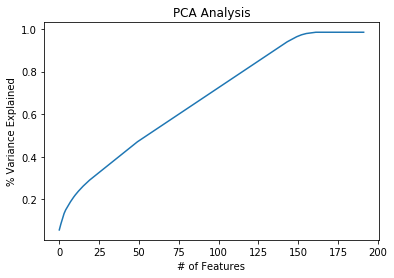

In [237]:
pca = PCA()
data = scale(train_df)
df_pca = pca.fit_transform(data)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()

In [238]:
pca = PCA(n_components=150)
data = scale(train_df)
df_pca = pca.fit_transform(data)

In [239]:
print('The Lending Club data comprises {} {}-dimensional representations of members.'.format(
        df_pca.shape[0],
        df_pca.shape[1]))

The Lending Club data comprises 887379 150-dimensional representations of members.


## Modeling

First, I create a baseline logistic regression model 

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df.drop('Target',axis=1), 
                                                    train_df['Target'], test_size=0.2)

In [242]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

def performance_report(model, predictions, X_test, Y_test):
    print('Cohen Kappa Score:', cohen_kappa_score(Y_test,predictions))
    print(' ')
    print('Classification Report')
    print(' ')
    print(classification_report(Y_test,predictions))
    y_true = pd.Series(Y_test, name='Actual')
    y_pred = pd.Series(model.predict(X_test), name='Predicted')
    conf_matrix = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print('')
    print('Predicted   0       1')
    print('Actual')
    print('0' + '         '+ str(conf_matrix[0][0]) + '    ' +str(conf_matrix[0][1]))
    print('1' + '         '+ str(conf_matrix[1][0]) + '    ' +str(conf_matrix[1][1]))
    print(' ')
    print('Confusion matrix (0 = "good" loan 1 = "bad" loan)')
    _ = plt.matshow(confusion_matrix(model.predict(X_test) , Y_test ), cmap=plt.cm.binary, interpolation='nearest')
    _ = plt.colorbar()
    _ = plt.ylabel('true label')
    _ = plt.xlabel('predicted label')

In [243]:
def ROC_curve(model, X_train, Y_train, X_test, Y_test):
    tmp = model.fit(X_train, Y_train)
    y_pred_sample_score = tmp.decision_function(X_test)


    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_sample_score)

    roc_auc = auc(fpr,tpr)


    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

('Cohen Kappa Score:', 0.78275221093270375)
 
Classification Report
 
             precision    recall  f1-score   support

          0       0.97      1.00      0.99    163887
          1       0.99      0.66      0.80     13589

avg / total       0.97      0.97      0.97    177476

Confusion Matrix

Predicted   0       1
Actual
0         163826    61
1         4563    9026
 
Confusion matrix (0 = "good" loan 1 = "bad" loan)


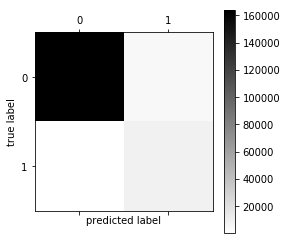

In [244]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
predictions = logmodel.predict(X_test)
performance_report(logmodel, predictions, X_test, Y_test)

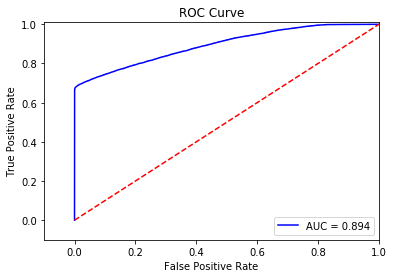

In [245]:
ROC_curve(logmodel, X_train, Y_train, X_test, Y_test)

According to the confusion matrix, the amount of false negatives, or the number of loans our model predicted as 'good' but actually are 'bad' is rather high (around 4412). The amount of false postives, or the number of loans our model predicted as 'bad' but turned out to be good' is very low at 122. Thus the recall score is around 0.67, which is problematic. While lending loan is hurt by false negatives, false positives do not have much of an impact, except that you would essentially turn down "good" loans. This low recall score caused by the high rate of false negatives might be a result of the class imbalance. Because there are so few "bad" loans in the dataset, approximately 7%, the model may be achieving high accuracy by predicting more loans as "good" purely as a result of this imbalance. While the model did achieve high accuracy, the accuracy may be simply reflecting the underlying class distribution.

In order to attempt to fix the class imbalance, I will perform oversampling on the training set using SMOTE

In [246]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [247]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_r, Y_train_r = sm.fit_sample(X_train_std, Y_train)

('Cohen Kappa Score:', 0.71843287564115355)
 
Classification Report
 
             precision    recall  f1-score   support

          0       0.98      0.98      0.98    163887
          1       0.74      0.74      0.74     13589

avg / total       0.96      0.96      0.96    177476

Confusion Matrix

Predicted   0       1
Actual
0         160394    3493
1         3558    10031
 
Confusion matrix (0 = "good" loan 1 = "bad" loan)


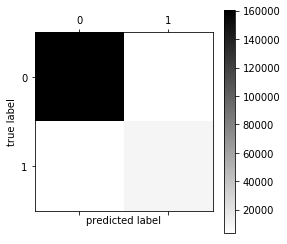

In [248]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train_r, Y_train_r)
predictions = logmodel2.predict(X_test_std)
performance_report(logmodel2, predictions, X_test_std, Y_test)

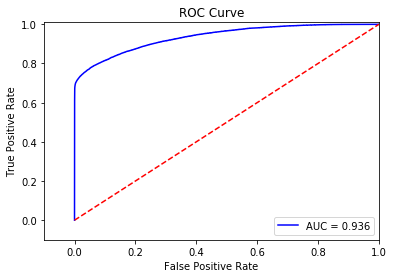

In [249]:
ROC_curve(logmodel2, X_train_r, Y_train_r, X_test_std, Y_test)

In [250]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X = X_train
Y = Y_train
X_resampled, Y_resampled, idx_resampled = rus.fit_sample(X, Y)

X_resampled = pd.DataFrame(X_resampled)
Y_resampled = pd.DataFrame(Y_resampled)
Y_resampled.columns = ['Class']
undersampled_data = pd.concat([X_resampled, Y_resampled], axis=1)

X = undersampled_data.values
Y = undersampled_data.Class.values
X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X, Y ,test_size=0.2)

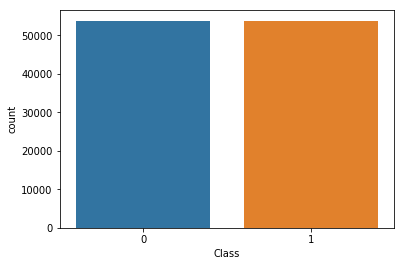

In [251]:
ax = sns.countplot(x='Class', data= Y_resampled)

('Cohen Kappa Score:', 0.70861292876247473)
 
Classification Report
 
             precision    recall  f1-score   support

          0       0.79      0.97      0.87     10583
          1       0.96      0.74      0.84     10953

avg / total       0.87      0.85      0.85     21536

Confusion Matrix

Predicted   0       1
Actual
0         10234    349
1         2800    8153
 
Confusion matrix (0 = "good" loan 1 = "bad" loan)


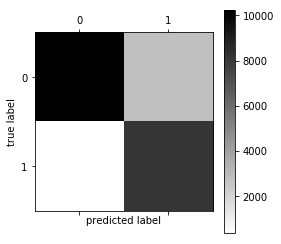

In [252]:
logmodel3 = LogisticRegression()
logmodel3.fit(X_train_rus, Y_train_rus)
predictions = logmodel3.predict(X_test_rus)
performance_report(logmodel3, predictions, X_test_rus, Y_test_rus)

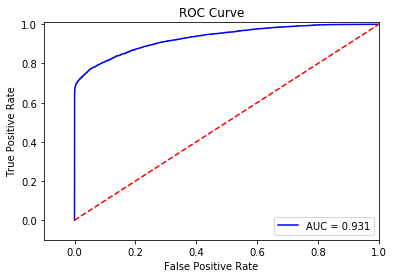

In [253]:
ROC_curve(logmodel3, X_train_rus, Y_train_rus, X_test_rus, Y_test_rus)